In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from modules.levelling import level_up
from modules.viz import bar_viz, line_viz
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as font_manager

# Adding custom Fire Emblem font:
font_dir = ['data/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
plt.rcParams['font.family'] = 'DanmarkURWTDem'

# disable chained assignments (bc who understands .loc properly?)
pd.options.mode.chained_assignment = None 

# Load Data:

In [2]:
def load_data():
    base_stats = pd.read_csv('data/base_stats.csv').fillna(0)
    char_growth = pd.read_csv('data/char_growth.csv').fillna(0)
    class_base = pd.read_csv('data/class_base.csv').fillna(0)
    class_growth = pd.read_csv('data/class_growth.csv').fillna(0)
    class_max = pd.read_csv('data/class_max.csv').fillna(0)
    
    return base_stats, char_growth, class_base, class_growth, class_max

In [17]:
# Load databases:
base_stats, char_growth, class_base, class_growth, class_max = load_data()

# Stat growth columns:
sg_cols = char_growth.columns.tolist()[1:]
sg_cols

['HP', 'Str', 'Mag', 'Dex', 'Spd', 'Def', 'Res', 'Lck', 'Bld']

In [18]:
# Create dictionary of the stat importance for each advanced class based on allocated category:
cat_dict = {'Phy': [0.2, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
            'Hyb': [0.2, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
            'Rng_P': [0.1, 1.0, 0.0, 1.0, 1.1, 1.0, 1.0, 1.0, 1.0],
            'Rng_M': [0.1, 0.0, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0, 1.0],
            'None': [0.2, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
}

# Character Comparisons:

In [25]:
# Lists and dictionaries of Advanced classes:
uniq_adv = class_base[(class_base['Unique'] !=0) & (class_base['Type'] == 'Advanced')][['Name', 'Unique']]
ua_dict = dict(zip(uniq_adv.Unique, uniq_adv.Name))
non_uniq = class_base[(class_base['Unique'] ==0) & (class_base['Type'] == 'Advanced')]['Name'].tolist()
non_uniq + ['Thief']
non_uniq[0:3]

['Swordmaster', 'Hero', 'Halberdier']

In [20]:
# Character list:
char_list = base_stats.Name.tolist()
char_list.remove('Veyle')
print(len(char_list))
char_list[0:3]

35


['Alear', 'Vander', 'Clanne']

## Looping Characters and Classes:

In [76]:
int_tgt = 30
rate_metric = 'promo_rt'
all_ratings = []

print("Character Ratings After %s Levels\n---------------------------------")
for char in char_list:
    
    char_ratings = []
    
    for pro_class in non_uniq:
        base_stats, char_growth, class_base, class_growth, class_max = load_data()
        # Return dataframe of stat changes:
        r_df = level_up(base_stats, char_growth, char, 
                        class_base, class_growth, class_max, 
                        int_tgt, promo_class=pro_class, base_tgt=10,
                        sg_cols=sg_cols, cat_dict=cat_dict)
        rating = r_df.loc[r_df.index[-1], rate_metric]
        print("%s | %s | Rt. %s." % (char, pro_class, rating))
        char_ratings.append(rating)
    
    try:
        base_stats, char_growth, class_base, class_growth, class_max = load_data()
        unique_class = ua_dict[char]
        r_df = level_up(base_stats, char_growth, char, 
                        class_base, class_growth, class_max, 
                        int_tgt, promo_class=unique_class, base_tgt=10,
                        sg_cols=sg_cols, cat_dict=cat_dict)
        rating = r_df.loc[r_df.index[-1], rate_metric]
        char_ratings.append(rating)
        print("%s | %s | Rt. %s" % (char, unique_class, rating))
    except KeyError:
        char_ratings.append(0)
    
    all_ratings.append(char_ratings)  

# Create dataframe of results:
res_df30 = pd.DataFrame([item[0:len(non_uniq)] for item in all_ratings], columns= non_uniq)
res_df30.insert(0, 'Name', char_list)
res_df30['Unique'] = [item[-1] for item in all_ratings]
res_df30['ideal_class'] = res_df30.iloc[:, 1:].idxmax(axis=1)
res_df30['av_rt'] = np.mean(res_df30.iloc[:, 1:-1], axis=1)
res_df30['max_rt'] = res_df30.iloc[:, 1:-2].max(axis=1)

Character Ratings After %s Levels
---------------------------------
Alear | Swordmaster | Rt. 141.0.
Alear | Hero | Rt. 139.0.
Alear | Halberdier | Rt. 140.0.
Alear | Royal Knight | Rt. 138.0.
Alear | Berserker | Rt. 137.0.
Alear | Warrior | Rt. 141.0.
Alear | Sniper | Rt. 134.0.
Alear | Bow Knight | Rt. 131.0.
Alear | General | Rt. 146.0.
Alear | Great Knight | Rt. 148.0.
Alear | Paladin | Rt. 145.0.
Alear | Wolf Knight | Rt. 142.0.
Alear | Sage | Rt. 135.0.
Alear | Mage Knight | Rt. 134.0.
Alear | Martial Master | Rt. 131.0.
Alear | High Priest | Rt. 136.0.
Alear | Griffin Knight | Rt. 144.0.
Alear | Wyvern Knight | Rt. 143.0.
Alear | Divine Dragon | Rt. 141.0
Vander | Swordmaster | Rt. 122.0.
Vander | Hero | Rt. 121.0.
Vander | Halberdier | Rt. 118.0.
Vander | Royal Knight | Rt. 115.0.
Vander | Berserker | Rt. 117.0.
Vander | Warrior | Rt. 121.0.
Vander | Sniper | Rt. 114.0.
Vander | Bow Knight | Rt. 116.0.
Vander | General | Rt. 123.0.
Vander | Great Knight | Rt. 122.0.
Vander | Pa

Lapis | Sage | Rt. 128.0.
Lapis | Mage Knight | Rt. 131.0.
Lapis | Martial Master | Rt. 125.0.
Lapis | High Priest | Rt. 131.0.
Lapis | Griffin Knight | Rt. 133.0.
Lapis | Wyvern Knight | Rt. 132.0.
Diamant | Swordmaster | Rt. 143.0.
Diamant | Hero | Rt. 142.0.
Diamant | Halberdier | Rt. 137.0.
Diamant | Royal Knight | Rt. 136.0.
Diamant | Berserker | Rt. 140.0.
Diamant | Warrior | Rt. 141.0.
Diamant | Sniper | Rt. 136.0.
Diamant | Bow Knight | Rt. 134.0.
Diamant | General | Rt. 140.0.
Diamant | Great Knight | Rt. 144.0.
Diamant | Paladin | Rt. 141.0.
Diamant | Wolf Knight | Rt. 139.0.
Diamant | Sage | Rt. 126.0.
Diamant | Mage Knight | Rt. 132.0.
Diamant | Martial Master | Rt. 130.0.
Diamant | High Priest | Rt. 127.0.
Diamant | Griffin Knight | Rt. 136.0.
Diamant | Wyvern Knight | Rt. 140.0.
Diamant | Successeur | Rt. 130.0
Amber | Swordmaster | Rt. 135.0.
Amber | Hero | Rt. 136.0.
Amber | Halberdier | Rt. 131.0.
Amber | Royal Knight | Rt. 124.0.
Amber | Berserker | Rt. 134.0.
Amber |

Seadall | Sniper | Rt. 136.0.
Seadall | Bow Knight | Rt. 136.0.
Seadall | General | Rt. 135.0.
Seadall | Great Knight | Rt. 139.0.
Seadall | Paladin | Rt. 138.0.
Seadall | Wolf Knight | Rt. 133.0.
Seadall | Sage | Rt. 130.0.
Seadall | Mage Knight | Rt. 134.0.
Seadall | Martial Master | Rt. 130.0.
Seadall | High Priest | Rt. 130.0.
Seadall | Griffin Knight | Rt. 135.0.
Seadall | Wyvern Knight | Rt. 136.0.
Rosado | Swordmaster | Rt. 147.0.
Rosado | Hero | Rt. 146.0.
Rosado | Halberdier | Rt. 143.0.
Rosado | Royal Knight | Rt. 140.0.
Rosado | Berserker | Rt. 141.0.
Rosado | Warrior | Rt. 147.0.
Rosado | Sniper | Rt. 141.0.
Rosado | Bow Knight | Rt. 139.0.
Rosado | General | Rt. 144.0.
Rosado | Great Knight | Rt. 144.0.
Rosado | Paladin | Rt. 147.0.
Rosado | Wolf Knight | Rt. 137.0.
Rosado | Sage | Rt. 130.0.
Rosado | Mage Knight | Rt. 139.0.
Rosado | Martial Master | Rt. 136.0.
Rosado | High Priest | Rt. 134.0.
Rosado | Griffin Knight | Rt. 142.0.
Rosado | Wyvern Knight | Rt. 137.0.
Goldm

In [54]:
res_df50['av_rt'] = np.mean(res_df50.iloc[:, 1:-1], axis=1)
res_df50['max_rt'] = res_df50.iloc[:, 1:-2].max(axis=1)

In [84]:
res_df50.sort_values(by="Sage", ascending=False).head(20)

Name  Swordmaster   Hero  Halberdier  Royal Knight  Berserker  \
32    Mauvier        234.0  235.0       238.0         236.0      218.0   
34       Jean        209.0  201.0       205.0         211.0      180.0   
21    Pandreo        190.0  186.0       187.0         206.0      165.0   
33       Anna        196.0  189.0       193.0         204.0      164.0   
26  Hortensia        190.0  183.0       177.0         197.0      157.0   
8       Chloe        202.0  195.0       195.0         199.0      171.0   
25     Merrin        220.0  209.0       211.0         213.0      177.0   
7      Celine        203.0  196.0       197.0         200.0      176.0   
10     Yunaka        191.0  186.0       188.0         195.0      168.0   
0       Alear        204.0  199.0       201.0         200.0      171.0   
30     Lindon        176.0  172.0       175.0         190.0      164.0   
2      Clanne        196.0  192.0       192.0         190.0      165.0   
3      Framme        191.0  184.0       185.0         187.0      165.0   
18    Kagetsu        230.0  224.0       221.0         219.0      179.0   
17        Ivy        171.0  166.0       168.0         181.0      154.0   
23    Timerra        202.0  200.0       196.0         196.0      164.0   
12   Citrinne        156.0  150.0       152.0         175.0      140.0   
20     Fogado        199.0  193.0       189.0         194.0      165.0   
13      Lapis        186.0  182.0       185.0         190.0      162.0   
27    Seadall        198.0  193.0       188.0         190.0      170.0   

    Warrior  Sniper  Bow Knight  General  ...   Sage  Mage Knight  \
32    221.0   229.0       224.0    249.0  ...  232.0        215.0   
34    191.0   195.0       194.0    210.0  ...  211.0        192.0   
21    173.0   184.0       194.0    179.0  ...  208.0        186.0   
33    176.0   186.0       192.0    188.0  ...  206.0        183.0   
26    165.0   176.0       182.0    170.0  ...  196.0        179.0   
8     186.0   186.0       187.0    192.0  ...  195.0        180.0   
25    191.0   204.0       208.0    198.0  ...  194.0        191.0   
7     188.0   192.0       190.0    194.0  ...  194.0        187.0   
10    177.0   186.0       184.0    173.0  ...  187.0        184.0   
0     188.0   192.0       187.0    199.0  ...  186.0        179.0   
30    172.0   173.0       182.0    168.0  ...  185.0        182.0   
2     180.0   184.0       178.0    190.0  ...  183.0        173.0   
3     177.0   177.0       175.0    181.0  ...  183.0        174.0   
18    196.0   214.0       206.0    210.0  ...  183.0        185.0   
17    165.0   168.0       176.0    157.0  ...  182.0        176.0   
23    181.0   191.0       188.0    186.0  ...  179.0        177.0   
12    148.0   155.0       165.0    147.0  ...  179.0        161.0   
20    179.0   186.0       188.0    176.0  ...  179.0        180.0   
13    178.0   182.0       183.0    174.0  ...  178.0        178.0   
27    183.0   186.0       185.0    177.0  ...  176.0        176.0   

    Martial Master  High Priest  Griffin Knight  Wyvern Knight  Unique  \
32           215.0        238.0           246.0          238.0     0.0   
34           193.0        219.0           216.0          209.0     0.0   
21           191.0        215.0           209.0          187.0     0.0   
33           186.0        211.0           210.0          192.0     0.0   
26           179.0        205.0           200.0          178.0   213.0   
8            184.0        200.0           210.0          202.0     0.0   
25           192.0        201.0           219.0          215.0     0.0   
7            187.0        198.0           205.0          195.0   200.0   
10           183.0        192.0           196.0          189.0     0.0   
0            178.0        189.0           205.0          205.0   205.0   
30           183.0        200.0           190.0          174.0     0.0   
2            173.0        185.0           198.0          197.0     0.0   
3            175.0        190.0           

In [85]:
res_df50.to_csv('results/MAD_50lvls.csv')

In [77]:
res_df30.sort_values(by="High Priest", ascending=False).head(20)

Name  Swordmaster   Hero  Halberdier  Royal Knight  Berserker  \
32    Mauvier        203.0  208.0       205.0         204.0      193.0   
18    Kagetsu        163.0  174.0       170.0         166.0      159.0   
25     Merrin        163.0  162.0       158.0         158.0      150.0   
21    Pandreo        146.0  142.0       142.0         156.0      139.0   
26  Hortensia        142.0  139.0       138.0         146.0      134.0   
34       Jean        144.0  143.0       141.0         144.0      138.0   
33       Anna        137.0  135.0       135.0         138.0      130.0   
7      Celine        145.0  144.0       143.0         142.0      138.0   
8       Chloe        142.0  141.0       140.0         141.0      137.0   
10     Yunaka        144.0  143.0       139.0         140.0      134.0   
0       Alear        141.0  139.0       140.0         138.0      137.0   
2      Clanne        138.0  138.0       137.0         135.0      133.0   
3      Framme        134.0  132.0       132.0         132.0      129.0   
12   Citrinne        117.0  114.0       110.0         125.0      105.0   
28     Rosado        147.0  146.0       143.0         140.0      141.0   
17        Ivy        124.0  122.0       118.0         127.0      116.0   
20     Fogado        141.0  140.0       134.0         135.0      133.0   
23    Timerra        142.0  141.0       137.0         136.0      137.0   
13      Lapis        127.0  125.0       131.0         132.0      131.0   
27    Seadall        142.0  139.0       136.0         134.0      134.0   

    Warrior  Sniper  Bow Knight  General  ...   Sage  Mage Knight  \
32    197.0   198.0       201.0    210.0  ...  207.0        203.0   
18    172.0   170.0       166.0    169.0  ...  156.0        163.0   
25    162.0   157.0       159.0    155.0  ...  155.0        158.0   
21    142.0   141.0       152.0    140.0  ...  163.0        159.0   
26    138.0   138.0       144.0    135.0  ...  152.0        150.0   
34    141.0   135.0       137.0    150.0  ...  146.0        138.0   
33    137.0   129.0       131.0    142.0  ...  143.0        136.0   
7     143.0   136.0       136.0    150.0  ...  140.0        138.0   
8     141.0   134.0       134.0    144.0  ...  142.0        136.0   
10    140.0   139.0       141.0    136.0  ...  137.0        139.0   
0     141.0   134.0       131.0    146.0  ...  135.0        134.0   
2     138.0   131.0       129.0    142.0  ...  135.0        132.0   
3     133.0   127.0       125.0    136.0  ...  133.0        129.0   
12    110.0   111.0       124.0    113.0  ...  125.0        113.0   
28    147.0   141.0       139.0    144.0  ...  130.0        139.0   
17    121.0   117.0       128.0    119.0  ...  132.0        126.0   
20    139.0   135.0       136.0    133.0  ...  131.0        135.0   
23    139.0   136.0       135.0    136.0  ...  130.0        136.0   
13    136.0   132.0       131.0    129.0  ...  128.0        131.0   
27    140.0   136.0       136.0    135.0  ...  130.0        134.0   

    Martial Master  High Priest  Griffin Knight  Wyvern Knight  Unique  \
32           197.0        208.0           213.0          205.0     0.0   
18           156.0        159.0           166.0          171.0     0.0   
25           153.0        156.0           160.0          158.0     0.0   
21           152.0        155.0           154.0          141.0     0.0   
26           145.0        154.0           146.0          135.0   145.0   
34           136.0        152.0           149.0          144.0     0.0   
33           133.0        145.0           145.0          139.0     0.0   
7            135.0        142.0           148.0          149.0   139.0   
8            136.0        142.0           149.0          145.0     0.0   
10           134.0        139.0           141.0          139.0     0.0   
0            131.0        136.0           144.0          143.0   141.0   
2            128.0        136.0           142.0          141.0     0.0   
3            126.0        136.0           

In [86]:
res_df30.to_csv('results/MAD_30lvls.csv')

# Visualizations:

In [26]:
int_tgt = 50
rate_metric = 'promo_rt'
all_char_stats = []


for char in char_list:
    print("Processing %s stats.\n---------------------------------" % char)
    
    # Cycle through all Advanced Class options:
    for pro_class in non_uniq:
        base_stats, char_growth, class_base, class_growth, class_max = load_data()
        # Return dataframe of stat changes throughout levelling:
        r_df = level_up(base_stats, char_growth, char, 
                        class_base, class_growth, class_max, 
                        int_tgt, promo_class=pro_class, base_tgt=10,
                        sg_cols=sg_cols, cat_dict=cat_dict)
        r_df['Promo_Class'] = pro_class
        all_char_stats.append(r_df)
    
    # Check whether a unique class is available:
    try:
        base_stats, char_growth, class_base, class_growth, class_max = load_data()
        unique_class = ua_dict[char]
        r_df = level_up(base_stats, char_growth, char, 
                        class_base, class_growth, class_max, 
                        int_tgt, promo_class=unique_class, base_tgt=10,
                        sg_cols=sg_cols, cat_dict=cat_dict)
        r_df['Promo_Class'] = unique_class
        all_char_stats.append(r_df)
    except KeyError:
        pass
     

Processing Alear stats.
---------------------------------
Processing Vander stats.
---------------------------------
Processing Clanne stats.
---------------------------------
Processing Framme stats.
---------------------------------
Processing Alfred stats.
---------------------------------
Processing Etie stats.
---------------------------------
Processing Boucheron stats.
---------------------------------
Processing Celine stats.
---------------------------------
Processing Chloe stats.
---------------------------------
Processing Louis stats.
---------------------------------
Processing Yunaka stats.
---------------------------------
Processing Alcryst stats.
---------------------------------
Processing Citrinne stats.
---------------------------------
Processing Lapis stats.
---------------------------------
Processing Diamant stats.
---------------------------------
Processing Amber stats.
---------------------------------
Processing Jade stats.
---------------------------------

In [29]:
# Concatenating all character dataframes together:
concat_df = pd.concat(all_char_stats)

# Adjusting dataframe to summarize stats by name, internal level and class:
melted_df = concat_df.melt(id_vars=["Name", "int_lev", "Class", "Promo_Class"], var_name="Metric", value_name="Value")

# Only retaining the key metrics:
melt_final = melted_df.loc[melted_df['Metric'].isin(sg_cols)].reset_index(drop=True)

In [31]:
print(melt_final.shape)
melt_final.head()

(226764, 6)


Name int_lev         Class  Promo_Class Metric Value
0  Alear       1  Dragon Child  Swordmaster     HP    22
1  Alear     2.0  Dragon Child  Swordmaster     HP  23.0
2  Alear     3.0  Dragon Child  Swordmaster     HP  24.0
3  Alear     4.0  Dragon Child  Swordmaster     HP  24.0
4  Alear     5.0  Dragon Child  Swordmaster     HP  25.0

In [32]:
melt_final.to_csv('data/char_levelled_stats.csv', index=False)

In [5]:
level = 30
c1 = 'Alcryst'
p1 = 'Tireur d’elite'
c2 = 'Panette'
p2 = 'Warrior'
c3 = 'Fogado'
p3 = 'Cupido'

# Character 1 levelling:
base_stats, char_growth, class_base, class_growth, class_max = load_data()
ch1 = level_up(base_stats, char_growth, c1,                         
             class_base, class_growth, class_max,                   
             level, p1, 10, sg_cols, cat_dict)  

# Chracter 2 levelling:
base_stats, char_growth, class_base, class_growth, class_max = load_data()
ch2 = level_up(base_stats, char_growth, c2,                         
             class_base, class_growth, class_max,                       
             level, p2, 10, sg_cols, cat_dict) 

# Chracter 3 levelling:
base_stats, char_growth, class_base, class_growth, class_max = load_data()
ch3 = level_up(base_stats, char_growth, c3,                         
             class_base, class_growth, class_max,                       
             level, p3, 10, sg_cols, cat_dict) 

#bar_viz(ch1, ch2, sg_cols, level)

In [202]:
melt_final[melt_final['int_lev']==10]['Value'].values

array([28, 11, 2, 17, 12, 8, 5, 8, 6], dtype=object)

In [12]:
levels = melt_final['int_lev'].unique()
names = melt_final['Name'].unique()
metrics = melt_final['Metric'].unique()

In [13]:
metrics

array(['HP', 'Str', 'Mag', 'Dex', 'Spd', 'Def', 'Res', 'Lck', 'Bld'],
      dtype=object)

In [ ]:
ya = melt_final[melt_final['Name']==]

# Plotly:

In [14]:
def create_mask(idx, n_chars):
    bool_mask = [False] * n_chars
    bool_mask[idx] = True
    
    return bool_mask

In [15]:
b_list = []
n_chars = len(names)

for i in range(n_chars):
    button = dict(label=names[i],
                 method="update",
                 args=[{"visible": create_mask(i, n_chars)},
                       {"title": ''}])
    b_list.append(button)

In [16]:
c_list = []
n_chars = len(names)

for i in range(n_chars):
    button = dict(label=names[i],
                 method="update",
                 args=[{"visible": create_mask(i, n_chars)},
                       {"title": ''}])
    c_list.append(button)

In [17]:
b_list

[{'label': 'Alcryst',
  'method': 'update',
  'args': [{'visible': [True, False, False]}, {'title': ''}]},
 {'label': 'Panette',
  'method': 'update',
  'args': [{'visible': [False, True, False]}, {'title': ''}]},
 {'label': 'Fogado',
  'method': 'update',
  'args': [{'visible': [False, False, True]}, {'title': ''}]}]

In [51]:
# fig = go.Figure(data=[
#     go.Bar(name='Alcryst', x=metrics, y=[20, 14, 23, 10, 11, 15, 30, 4, 16]),
#     go.Bar(name='Fogado', x=metrics, y=[12, 18, 29, 11, 3, 40, 21, 23, 15])
# ])
fig = go.Figure(data=bar_data)

# Change the bar mode
fig.update_layout(barmode='group')

# for lev in levels:
#     fig.add_trace(
#         go.Bar(
#             x = metrics,
#             y = melt_final[melt_final['int_lev']==lev]['Value'].values,
#             name = lev
#         )
#     )

# Add dropdown
button_layer_1_height = 1.2
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list(b_list),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        ),
        dict(
            buttons=list(c_list),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=False,
            x=0.37,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        )
    ])


# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [20]:
names

array(['Alcryst', 'Panette', 'Fogado'], dtype=object)

In [21]:
levels

array([10, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0,
       21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0],
      dtype=object)

In [28]:
melt_final[(melt_final['Name']== 'Alcryst') & (melt_final['int_lev'] == 17)]['Value'].values.tolist()

[28, 11, 2, 17, 12, 8, 5, 8, 6]

In [31]:
bar_data = []

for c in names:
    metric_vals = melt_final[(melt_final['Name']==c) & (melt_final['int_lev']==20)]['Value'].values.tolist()
    bar_spec = go.Bar(name=c, x=metrics, y=metric_vals)
    bar_data.append(bar_spec)

In [12]:
df = pd.read_csv("test_data.csv")

# Create a figure using Plotly Express
fig = px.bar(df, x="Metric", y="Value", color="Name",
             barmode="group", facet_row="int_lev")

# Update the layout of the figure
fig.update_layout(
    title="Character Metrics by Level",
    xaxis_title="Metric",
    yaxis_title="Value"
)

# Display the figure in the notebook
fig.show()

In [55]:
fig = go.Figure(data=bar_data)

# Change the bar mode
fig.update_layout(barmode='group')

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Alcryst",
                     method="update",
                     args=[{"visible": [True, True, False]}]),
                dict(label="Panette",
                     method="update",
                     args=[{"visible": [True, True, False]},
                           ]),
                dict(label="Fogado",
                     method="update",
                     args=[{"visible": [False, True, True]},
                           ]),
                ]),
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.1,
                xanchor="left",
                y=button_layer_1_height,
                yanchor="top",
            ),
        dict(
            buttons=list([
                dict(label="Alcryst",
                     method="update",
                     args=[{"visible": [False, True, False]}]),
                dict(label="Panette",
                     method="update",
                     args=[{"visible": [True, True, False]},
                           ]),
                dict(label="Fogado",
                     method="update",
                     args=[{"visible": [False, True, True]},
                           ]),
                ]),
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=False,
                x=0.37,
                xanchor="left",
                y=button_layer_1_height,
                yanchor="top",
            ),
    ])


fig.show()

## Altair:

In [160]:
# Dropdown selection menus:
dropdown_name1 = alt.binding_select(options=names, labels=names, name=" ")
dropdown_name2 = alt.binding_select(options=names, labels=names, name=" ")

sel_name1 = alt.selection_single(fields=["Name"], bind=dropdown_name1, name="char1", init={'Name': 'Anna'})
sel_name2 = alt.selection_single(fields=["Name"], bind=dropdown_name2, name="char2", init={'Name': 'Ivy'})


# Slider selection:
lev_slider = alt.binding_range(min=min(ch1_melt_final['int_lev']), 
                               max=max(ch1_melt_final['int_lev']), step=1)

slider_selection = alt.selection_single(
                            bind=lev_slider, 
                            fields=['int_lev'], 
                            init={'int_lev': max(ch1_melt_final['int_lev'])},
                            name="Hello")


# Base chart:
base = alt.Chart(melt_final).mark_bar().encode(
    x='Value:Q',
    y='Name:O',
    color='Name:N',
    row='Metric:N',
)

# Add selections:
filter_level = base.add_selection(sel_name1, sel_name2, slider_selection).transform_filter(slider_selection)
filter_level

alt.Chart(...)

In [ ]:
# Dropdown selection menus:
dropdown_name1 = alt.binding_select(options=names, labels=names, name=" ")
dropdown_name2 = alt.binding_select(options=names, labels=names, name=" ")

drop_select = alt.selection_single(fields=["Name", "Name"], 
                                   bind={'Name': dropdown_name1, 'Name':dropdown_name2},
                                 name=["Char1", "Char2"], init={'Name': 'Anna', 'Name': 'Ivy'})
#sel_name2 = alt.selection_single(fields=["Name"], bind=dropdown_name2, name="char2", init={'Name': 'Ivy'})


# Slider selection:
lev_slider = alt.binding_range(min=min(ch1_melt_final['int_lev']), 
                               max=max(ch1_melt_final['int_lev']), step=1)

slider_selection = alt.selection_single(
                            bind=lev_slider, 
                            fields=['int_lev'], 
                            init={'int_lev': max(ch1_melt_final['int_lev'])},
                            name="Hello")


# Base chart:
base = alt.Chart(ch1_melt_final).mark_bar().encode(
    x='Value:Q',
    y='Name:O',
    color='Name:N',
    row='Metric:N',
)

# Add selections:
filter_level = base.add_selection(drop_select, slider_selection).transform_filter(
                                    slider_selection).transform_filter(
                                    drop_select)

filter_level

## Comparison Bar Plot:

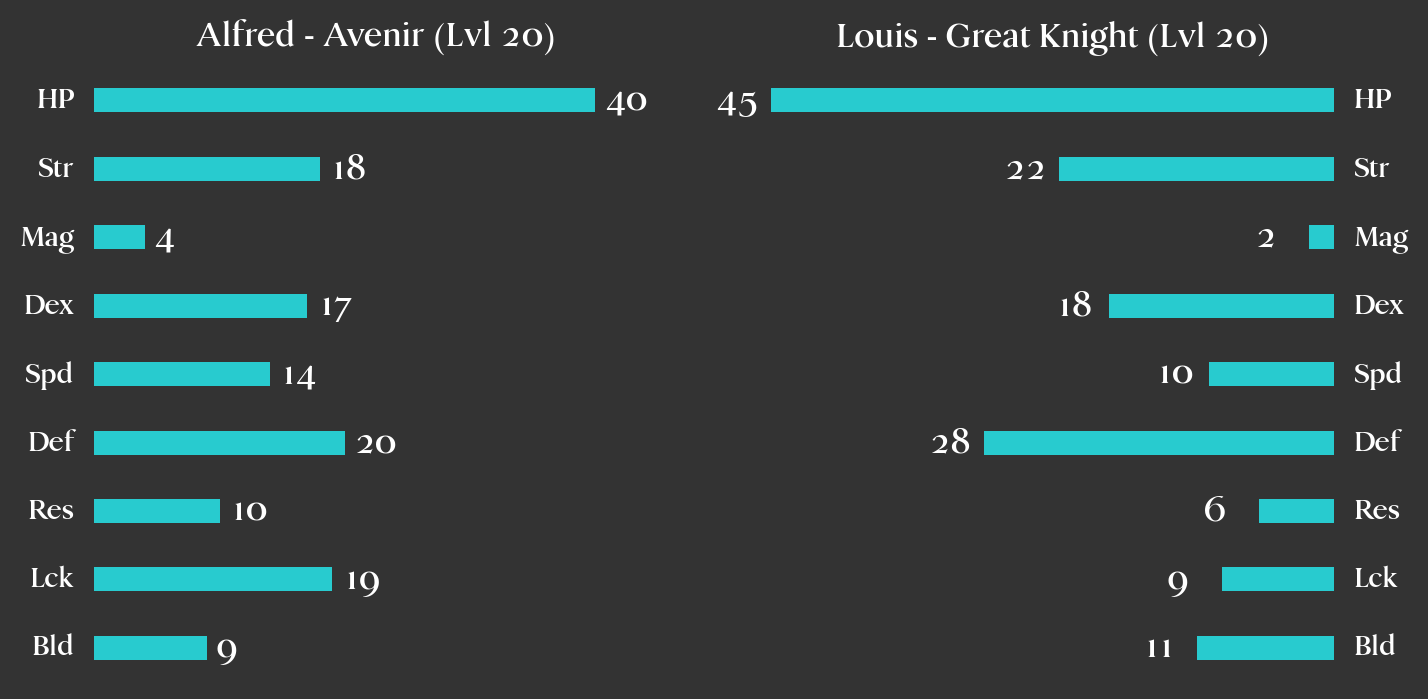

In [15]:
bar_viz(ch1, ch2, sg_cols, 20)

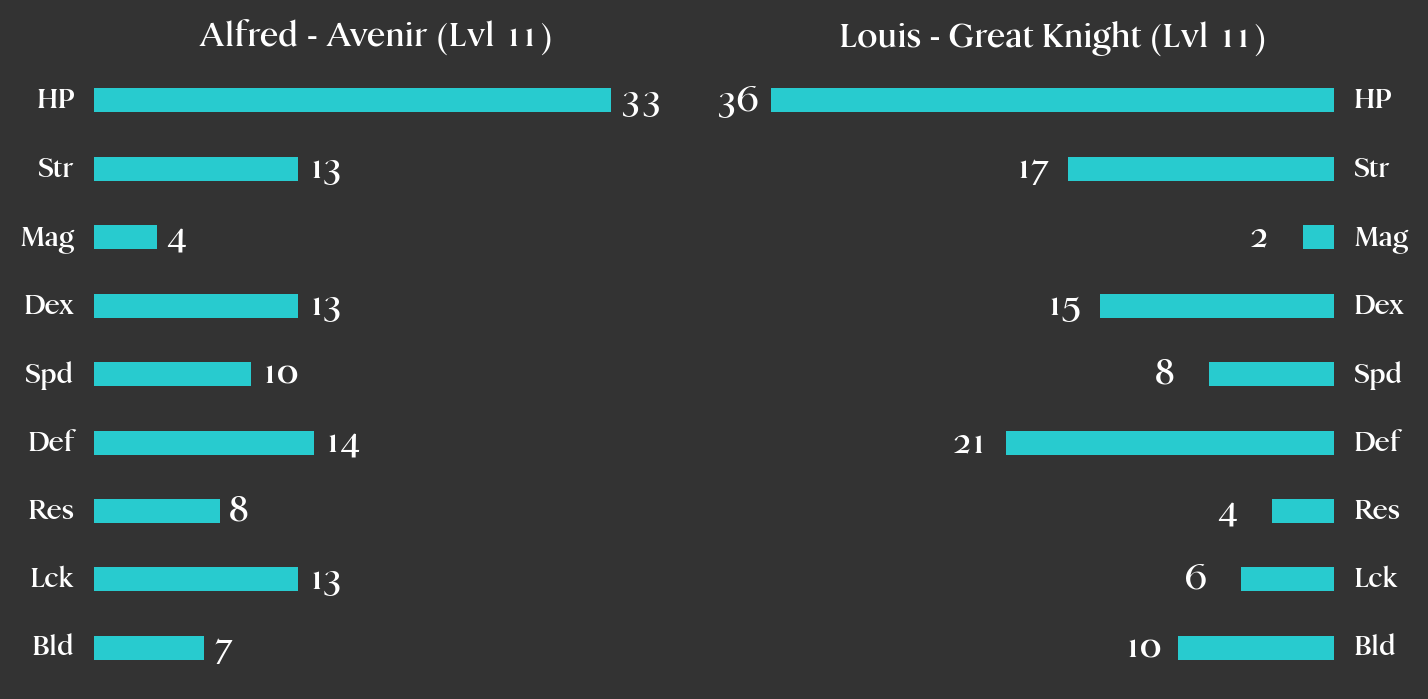

In [17]:
bar_viz(ch1, ch2, sg_cols, 11)

## Comparison Lineplots:

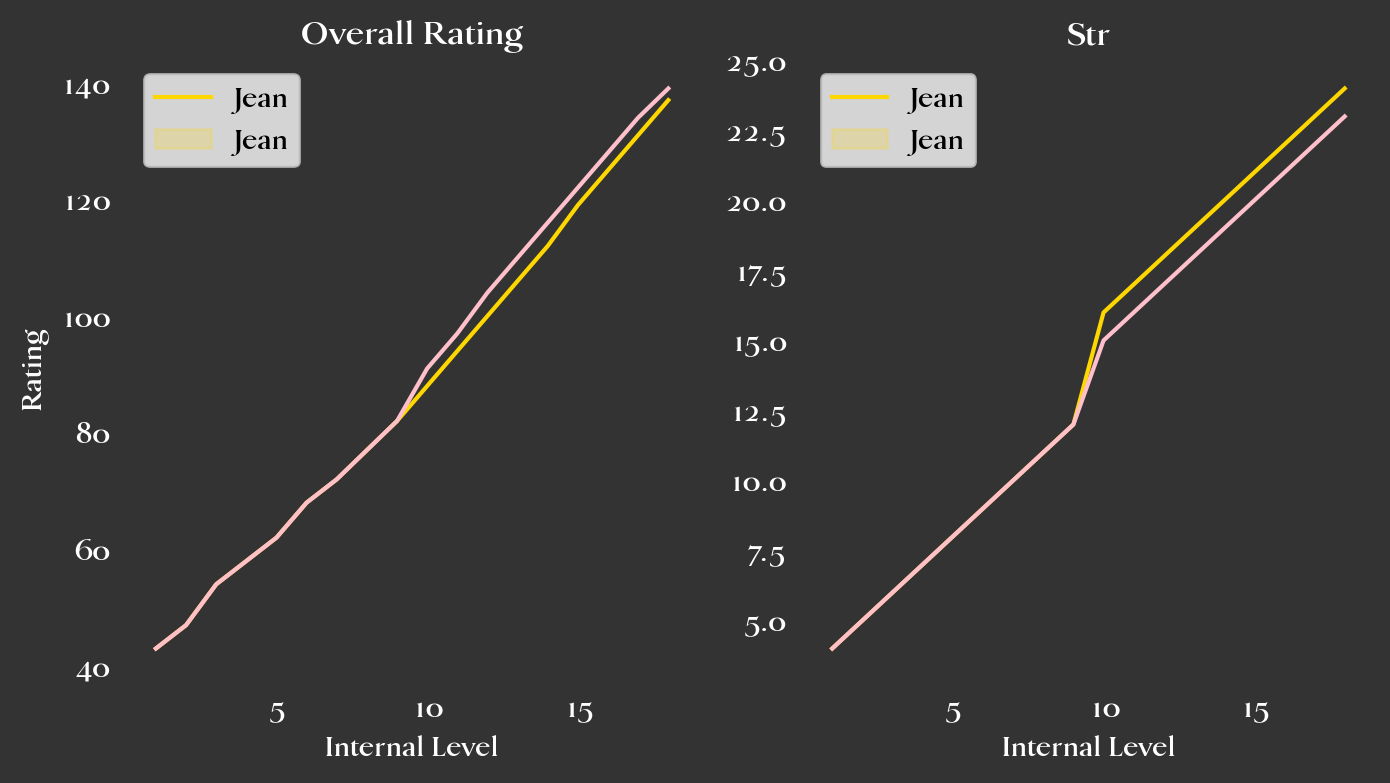

In [35]:
# Rating types: promo_rt or game_rt
line_viz(ch1, ch2, 'promo_rt', 'Str')

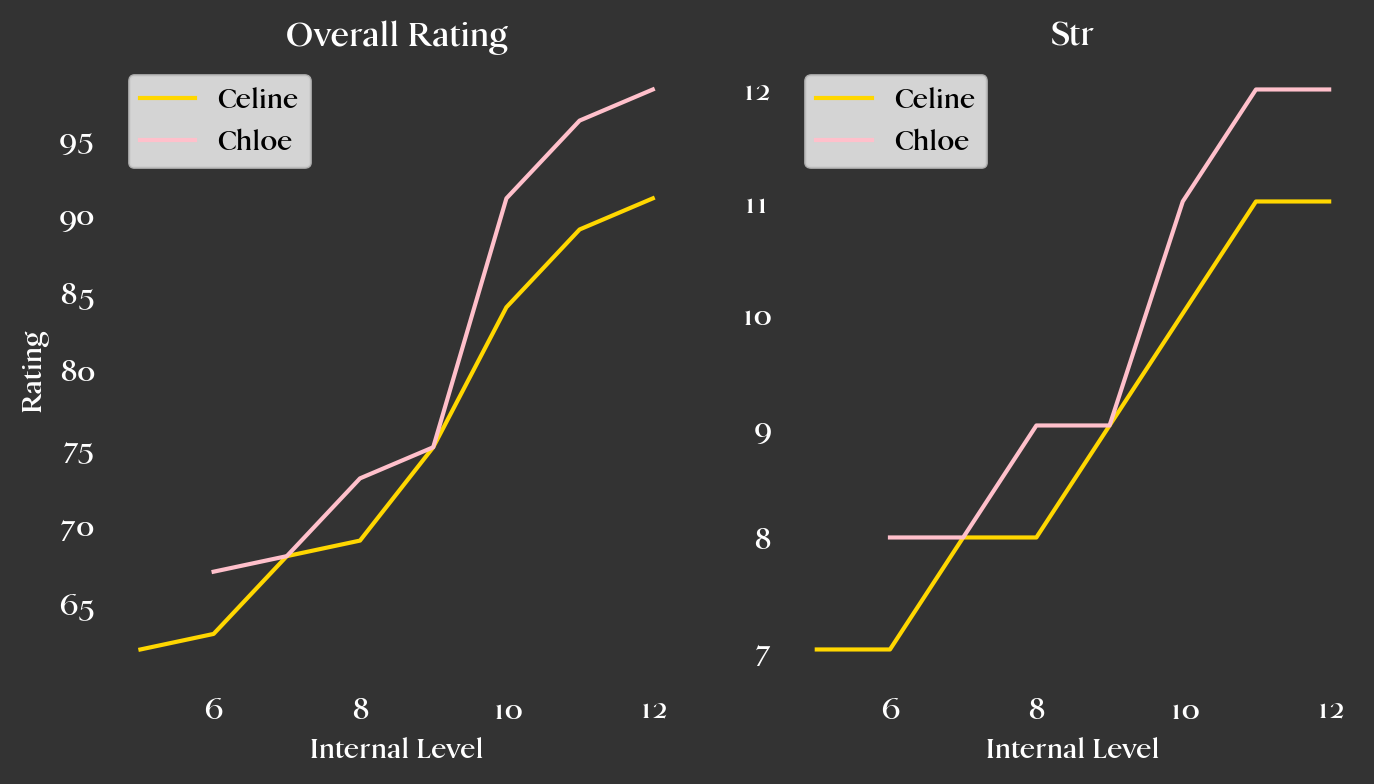

In [14]:
# Rating types: promo_rt or game_rt
line_viz(ch1, ch2, 'game_rt', 'Str')

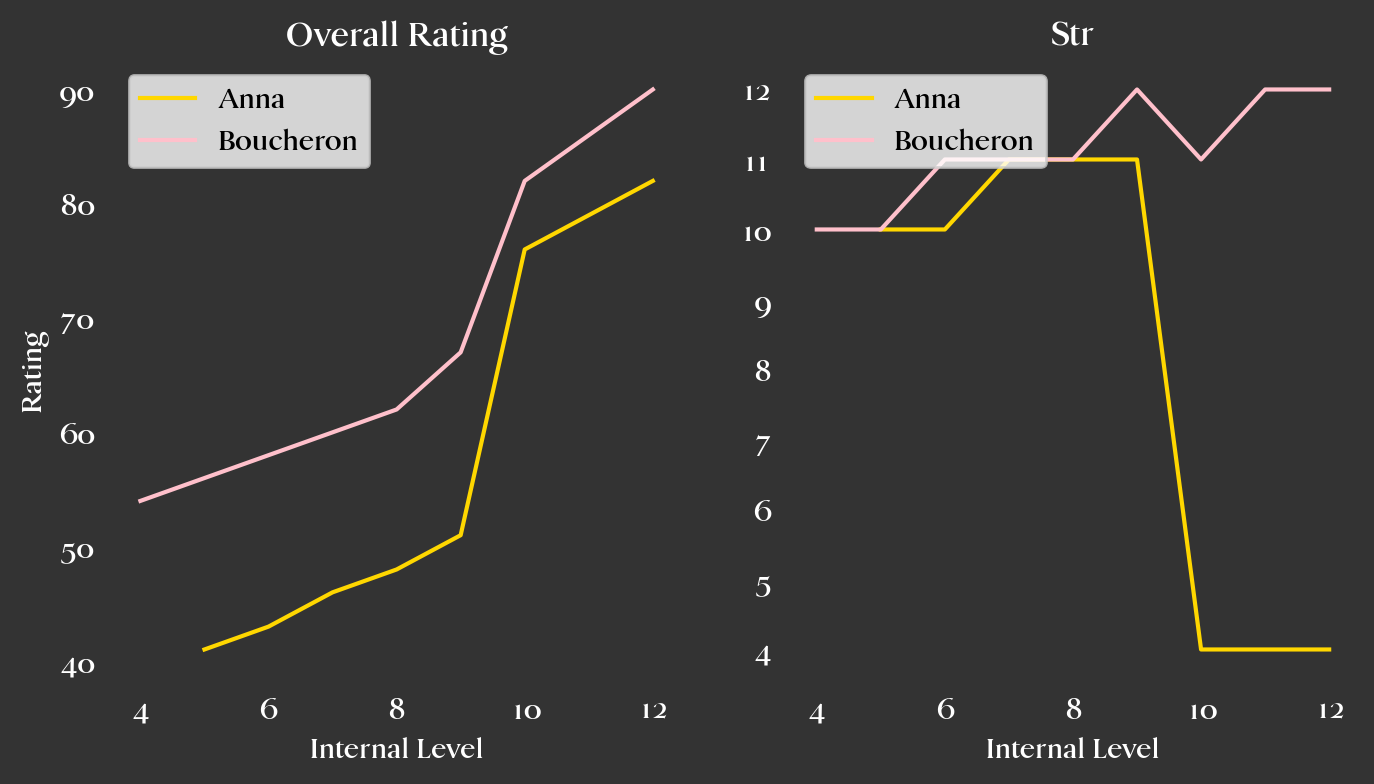

In [18]:
# Rating types: promo_rt or game_rt
line_viz(ch1, ch2, 'promo_rt', 'Str')